PROJECT
Build a content-based recommender movie system using Amazon Prime dataset.

This dataset has two files containing the titles (titles.csv) and the cast (credits.csv) for the title.

This dataset contains +9k unique titles on Amazon Prime with 15 columns containing their information, including:

id: The title ID on JustWatch.
title: The name of the title.
show_type: TV show or movie.
description: A brief description.
release_year: The release year.
age_certification: The age certification.
runtime: The length of the episode (SHOW) or movie.
genres: A list of genres.
production_countries: A list of countries that produced the title.
seasons: Number of seasons if it's a SHOW.
imdb_id: The title ID on IMDB.
imdb_score: Score on IMDB.
imdb_votes: Votes on IMDB.
tmdb_popularity: Popularity on TMDB.
tmdb_score: Score on TMDB.

And over +124k credits of actors and directors on Amazon Prime titles with 5 columns containing their information:

person_ID: The person ID on JustWatch.
id: The title ID on JustWatch.
name: The actor or director's name.
character_name: The character name.
role: ACTOR or DIRECTOR.

Importing the necessary modules and load the dataset.

In [259]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
from sklearn.feature_extraction.text import TfidfVectorizer


In [260]:
#Loading data
video = pd.read_csv('titles.csv')


In [277]:
video.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],0.0,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],0.0,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],0.0,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],0.0,7.9,30924.0,8.273,7.6


Showing infomation about the datasets

In [262]:
#Size of data
video.shape

(9871, 15)

In [263]:
video.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtypes: float64(5), int64(

In [264]:
video.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,9871.000000,9871.000000,1357.000000,8850.000000,8.840000e+03,9324.000000,7789.000000
mean,2001.327221,85.973052,2.791452,5.976395,8.533614e+03,6.910204,5.984247
std,25.810071,33.512466,4.148958,1.343842,4.592015e+04,30.004098,1.517986
min,1912.000000,1.000000,1.000000,1.100000,5.000000e+00,0.000011,0.800000
25%,1995.500000,65.000000,1.000000,5.100000,1.170000e+02,1.232000,5.100000
50%,2014.000000,89.000000,1.000000,6.100000,4.625000e+02,2.536000,6.000000
75%,2018.000000,102.000000,3.000000,6.900000,2.236250e+03,5.634000,6.900000
max,2022.000000,549.000000,51.000000,9.900000,1.133692e+06,1437.906000,10.000000


In [265]:
video.nunique()

id                      9868
title                   9737
type                       2
description             9734
release_year             110
age_certification         11
runtime                  207
genres                  2028
production_countries     497
seasons                   32
imdb_id                 9201
imdb_score                86
imdb_votes              3650
tmdb_popularity         5325
tmdb_score                89
dtype: int64

WORKING WITH MISSING DATA

In [266]:
video.isnull().sum()

id                         0
title                      0
type                       0
description              119
release_year               0
age_certification       6487
runtime                    0
genres                     0
production_countries       0
seasons                 8514
imdb_id                  667
imdb_score              1021
imdb_votes              1031
tmdb_popularity          547
tmdb_score              2082
dtype: int64

In [270]:
#Dropping unneccesary columns
video.drop(['imdb_id'],axis='columns',inplace=True)


In [278]:
# Dropping Na's from the following columns
video.dropna(subset=['imdb_score','imdb_votes', 'tmdb_popularity', 'tmdb_score', 'age_certification'],inplace=True)

In [279]:
#Replacing Seasons null values with zeros since movies are not seassons
video['seasons'] = video['seasons'].fillna(0)

In [280]:
#Making sure there are no errors
video.isnull().sum()

id                      0
title                   0
type                    0
description             1
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
dtype: int64

In [272]:
video.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],0.0,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],0.0,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],0.0,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],0.0,7.9,30924.0,8.273,7.6


In [281]:
#Print plot overviews of the first 5 movies.
video['description'].head()

0     The Three Stooges were an American vaudeville ...
6     A holiday favourite for generations...  George...
13    High-school principal Dr. Alfred Carroll relat...
34    The classic Shirley Temple film in which a lit...
51    A tale of the World War I love affair, begun i...
Name: description, dtype: object

In [283]:
#Creating a new column
video['Unique_ID'] = video.index + 1


#Shift new column to first position
first_column = video.pop('Unique_ID')
  
#Insert column using insert(position,column_name,first_column) function
video.insert(0, 'Unique_ID', first_column)

video.head()


,Unique_ID,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,1,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,8.6,1092.0,15.424,7.6
6,7,tm87233,It's a Wonderful Life,MOVIE,A holiday favourite for generations... George...,1946,PG,130,"['drama', 'family', 'fantasy', 'romance', 'com...",['US'],0.0,8.6,444243.0,26.495,8.3
13,14,tm112415,Tell Your Children,MOVIE,High-school principal Dr. Alfred Carroll relat...,1938,PG,66,"['drama', 'crime']",['US'],0.0,3.7,8617.0,5.412,4.1
34,35,tm159975,The Little Princess,MOVIE,The classic Shirley Temple film in which a lit...,1939,G,93,"['comedy', 'drama', 'family']",['US'],0.0,7.1,6122.0,6.148,6.8
51,52,tm52,A Farewell to Arms,MOVIE,"A tale of the World War I love affair, begun i...",1932,PG,89,"['drama', 'romance', 'war']",['US'],0.0,6.4,5970.0,7.581,6.3


DATA VISUALIZATION

c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


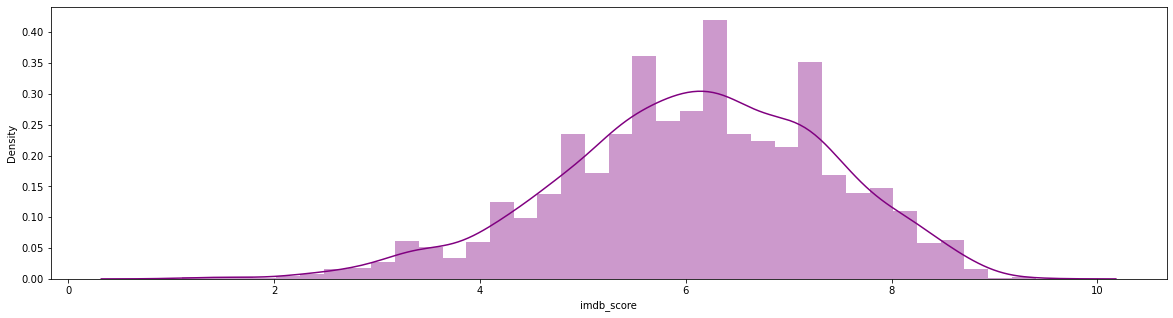

In [287]:
#Distribution of IMDb Rating
plt.figure(figsize=(20,5))
sns.distplot(video['imdb_score'], color = 'purple')
plt.show()

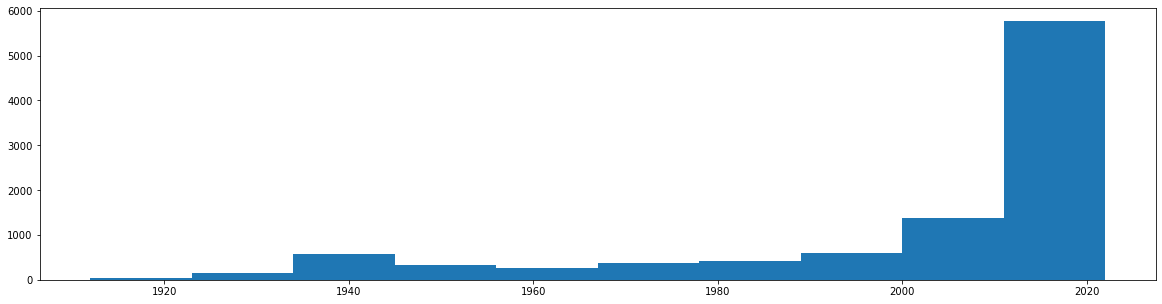

In [257]:
#Checking distribution of when released
plt.figure(figsize=(20,5))
plt.hist(video['release_year'])
plt.show()

Movie Runtime distribution plot

c:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


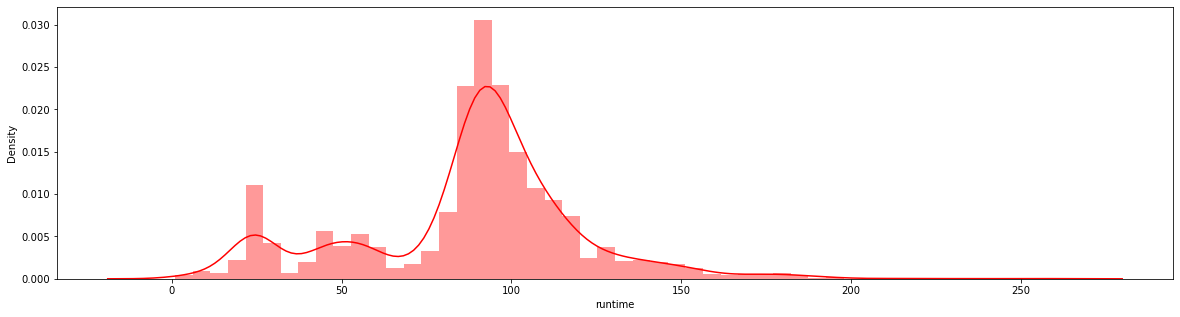

In [327]:
#Distribution of runtime
plt.figure(figsize=(20,5))
sns.distplot(video['runtime'], color= 'red')
plt.show()

In [334]:
#Define a TF-IDF Vectorizer Object. Removing all english stop words such as 'the', 'a'
TFIDF = TfidfVectorizer(stop_words='english')


In [335]:
#Replacing NaN with an empty string
video['description'] = video['description'].fillna('')

In [336]:
#Construct the required TF-IDF matrix by fitting and transforming the data
TFIDF_matrix = TFIDF.fit_transform(video['description'])


In [337]:
#Output the shape of tfidf_matrix
TFIDF_matrix.shape

(3006, 16766)

In [338]:
#Array mapping from feature integer indices to feature name.
TFIDF.get_feature_names_out()[1000:1010]

array(['arnaz', 'arnold', 'arnstein', 'aroma', 'arora', 'arrange',
       'arranged', 'arrangement', 'arrangements', 'arranges'],
      dtype=object)

In [339]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(TFIDF_matrix, TFIDF_matrix)

In [340]:
cosine_sim.shape

(3006, 3006)

In [316]:
cosine_sim[3]

array([0.        , 0.        , 0.        , ..., 0.0394404 , 0.        ,
       0.01265923])

In [341]:
#Construct a reverse map of indices and movie titles
indice = pd.Series(video.index, index=video['title']).drop_duplicates()

In [342]:
indice[:5]

title
The Three Stooges         0
It's a Wonderful Life     6
Tell Your Children       13
The Little Princess      34
A Farewell to Arms       51
dtype: int64

In [343]:
def recommended(title, cosine_sim=cosine_sim):
    #Get the index of the movie that matches the title
    index = indice[title]

    #Get the pairwsie similarity scores of all movies with that movie
    similar_scores = list(enumerate(cosine_sim[index]))

    #Sort the movies based on the similarity scores
    similar_scores = sorted(similar_scores, key=lambda x: x[1], reverse=True)

    #Get the scores of the 10 most similar movies
    similar_scores = similar_scores[1:6]

    #Get the movie indices
    movie_indice = [i[0] for i in similar_scores]

    #Return the top 10 most similar movies
    return video['title'].iloc[movie_indice]

In [344]:
recommended('Black Rain')

1026           Battle of Britain
2839    America's Next Top Model
7851                   The Field
7581              Making the Cut
3123    Fetch! with Ruff Ruffman
Name: title, dtype: object

In [346]:
recommended("America's Next Top Model")

5917    The Cat In The Hat Knows A Lot About Halloween!
8933                          The Man Who Fell to Earth
2942                                          Winx Club
5235                                A Country Christmas
5657                                    Little Charmers
Name: title, dtype: object

In [350]:
import pickle

vectorizer = 'prime-model.pkl'
pickle.dump(vectorizer, open("vectorizer.pickle", "wb"))

vectorizer = pickle.load(open("vectorizer.pickle", "rb"))
